In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl

# set font to 15
mpl.rcParams.update({'font.size': 8})

# Set Helvetica font globally
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']

# Optional: make sure fonts are updated
mpl.rcParams['pdf.fonttype'] = 42  # Avoids Type 3 fonts in PDF output
mpl.rcParams['ps.fonttype'] = 42

In [2]:
nerd_sqlite = '../../Core_nerd_analysis/nerd.sqlite'
rg_ids = [123, 124, 129, 130]  # update if needed

conn = sqlite3.connect(nerd_sqlite)
conn.row_factory = sqlite3.Row

query = """
SELECT *
FROM probe_tc_fits_view
WHERE fit_kind = 'round3_constrained'
  AND rg_id IN ({})
  AND rt_protocol = 'MRT'
ORDER BY rg_id
""".format(",".join(["?"] * len(rg_ids)))

df = pd.read_sql_query(query, conn, params=rg_ids)
conn.close()
df

,fit_run_id,rg_id,nt_id,fit_kind,rg_label,temperature,probe,probe_conc,rt_protocol,buffer_id,...,buffer_name,nt_site,nt_base,kobs,log_kobs,log_kdeg,log_kobs_err,log_kdeg_err,r2,metadata_json
0,274536,123,797,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,103,G,0.000660,-7.323764,-8.067974,0.296183,0.0,0.487337,"{""base"": ""G"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
1,274537,123,798,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,104,A,0.022931,-3.775280,-8.067974,0.039808,0.0,0.981779,"{""base"": ""A"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
2,274538,123,799,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,105,A,0.017473,-4.047125,-8.067974,0.045539,0.0,0.976153,"{""base"": ""A"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
3,274539,123,800,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,106,U,0.000927,-6.983541,-8.067974,0.267403,0.0,0.538394,"{""base"": ""U"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
4,274540,123,801,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,107,U,0.001103,-6.809645,-8.067974,0.144518,0.0,0.799772,"{""base"": ""U"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,275511,124,939,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,245,G,0.000381,-7.873467,-8.242844,0.577642,0.0,0.374830,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,..."
412,275516,124,944,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,250,G,0.000255,-8.273244,-8.242844,1.030822,0.0,0.158407,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,..."
413,275517,124,945,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,251,G,0.000253,-8.280811,-8.242844,1.323388,0.0,0.102497,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,..."
414,275520,124,948,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,254,G,0.000547,-7.510987,-8.242844,0.923467,0.0,0.190010,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,..."


In [3]:
import numpy as np

def calculate_dG(logkobs, logkadd):
    R = 1.9872036e-3  # kcal/(mol*K)
    T = 298.15  # K
    
    logKKp1 = logkobs - logkadd
    KKp1 = np.exp(logKKp1) # K / (K+1)
    K = KKp1 / (1 - KKp1)
    dG = -R * T * np.log(K)

    return dG

logkadd = -2.676278119425211 # logkadd
logkobs_r2_99 = -3.4806204679354953
logkobs_r2_55 = -7.240355294404981
logkobs_r2_39 = -7.503658411920693

dG_r2_99 = calculate_dG(logkobs_r2_99, logkadd)
dG_r2_55 = calculate_dG(logkobs_r2_55, logkadd)
dG_r2_39 = calculate_dG(logkobs_r2_39, logkadd)

print(f"dG for r2=0.99: {dG_r2_99:.2f} kcal/mol")
print(f"dG for r2=0.55: {dG_r2_55:.2f} kcal/mol")
print(f"dG for r2=0.39: {dG_r2_39:.2f} kcal/mol")

dG for r2=0.99: 0.13 kcal/mol
dG for r2=0.55: 2.70 kcal/mol
dG for r2=0.39: 2.86 kcal/mol


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


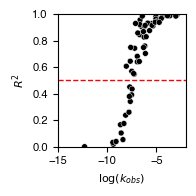

In [25]:
# filter to nt_base = C
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df_c = df[df['nt_base'] == 'C']

fig, ax = plt.subplots(figsize=(2, 2))

# Main scatter plot
sns.scatterplot(data=df_c, x='log_kobs', y='r2', color = 'black', size = 1, ax=ax)
# set main axes labels

# draw horizontal line at r2 = 0.50
ax.axhline(0.50, color='red', linestyle='--', linewidth=1)
ax.set_xlabel(r'$\log(k_{obs})$')
ax.set_ylabel(r'$R^2$')


# set xlim -15 to -2
ax.set_xlim(-15, -2)
ax.set_ylim(0, 1)

# remove legend
ax.legend().remove()

plt.tight_layout()
plt.savefig("r2_v_log_kobs_p4p6_C.pdf")
plt.show()

In [26]:
df_c

,fit_run_id,rg_id,nt_id,fit_kind,rg_label,temperature,probe,probe_conc,rt_protocol,buffer_id,...,buffer_name,nt_site,nt_base,kobs,log_kobs,log_kdeg,log_kobs_err,log_kdeg_err,r2,metadata_json
6,274542,123,803,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,109,C,0.012702,-4.365995,-8.067974,0.035195,0.0,0.985545,"{""base"": ""C"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
18,274554,123,815,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,121,C,0.006395,-5.052206,-8.067974,0.053141,0.0,0.967432,"{""base"": ""C"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
21,274557,123,818,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,124,C,0.054657,-2.906675,-8.067974,0.020932,0.0,0.995063,"{""base"": ""C"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
24,274560,123,821,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,127,C,0.001241,-6.691844,-8.067974,0.124173,0.0,0.844031,"{""base"": ""C"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
25,274561,123,822,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,128,C,0.001296,-6.648599,-8.067974,0.062301,0.0,0.955552,"{""base"": ""C"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,275340,124,934,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,240,C,0.000254,-8.277625,-8.242844,0.971599,0.0,0.174845,"{""base"": ""C"", ""fmod_run_ids"": [44, 45, 46, 47,..."
360,275355,124,949,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,255,C,0.009006,-4.709859,-8.242844,0.116306,0.0,0.937200,"{""base"": ""C"", ""fmod_run_ids"": [44, 45, 46, 47,..."
365,275360,124,954,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,260,C,0.002224,-6.108494,-8.242844,0.291251,0.0,0.702658,"{""base"": ""C"", ""fmod_run_ids"": [44, 45, 46, 47,..."
368,275363,124,957,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,263,C,0.001841,-6.297629,-8.242844,0.260076,0.0,0.747605,"{""base"": ""C"", ""fmod_run_ids"": [44, 45, 46, 47,..."


In [27]:
# count of points with r2 >= 0.50
total_dfc = len(df_c)
count_r2_ge_50 = df_c[df_c['r2'] >= 0.50].shape[0]
print(f"Count of points with R^2 >= 0.50: {count_r2_ge_50}")
print(f"Total points: {total_dfc}")
print(f"Fraction of points with R^2 >= 0.50: {count_r2_ge_50 / total_dfc:.2f}")

Count of points with R^2 >= 0.50: 48
Total points: 70
Fraction of points with R^2 >= 0.50: 0.69


In [28]:
df_a = df[df['nt_base'] == 'A']
total_dfa = len(df_a)
count_r2_ge_50_a = df_a[df_a['r2'] >= 0.50].shape[0]
print(f"Count of points with R^2 >= 0.50 (A): {count_r2_ge_50_a}")
print(f"Total points (A): {total_dfa}")
print(f"Fraction of points with R^2 >= 0.50 (A): {count_r2_ge_50_a / total_dfa:.2f}")

Count of points with R^2 >= 0.50 (A): 98
Total points (A): 98
Fraction of points with R^2 >= 0.50 (A): 1.00


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


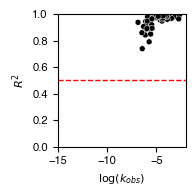

In [19]:
# filter to nt_base = C
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df_c = df[df['nt_base'] == 'A']

fig, ax = plt.subplots(figsize=(2, 2))

# Main scatter plot
sns.scatterplot(data=df_c, x='log_kobs', y='r2', color = 'black', size = 1, ax=ax)
# set main axes labels

# draw horizontal line at r2 = 0.50
ax.axhline(0.50, color='red', linestyle='--', linewidth=1)
ax.set_xlabel(r'$\log(k_{obs})$')
ax.set_ylabel(r'$R^2$')


# set xlim -15 to -2
ax.set_xlim(-15, -2)
ax.set_ylim(0, 1)

# remove legend
ax.legend().remove()

plt.tight_layout()
plt.savefig("r2_v_log_kobs_p4p6_A.pdf")
plt.show()